In [13]:
from faster_whisper import WhisperModel
import pyaudio
import soundfile as sf
import os
import pandas as pd
import numpy as np
import librosa
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
DATASET_DIR = './Dataset/train/audio/'


In [5]:
# This block of code was insipired by the following link:
# https://github.com/OldBonhart/TensorFlow_Speech_Recognition_Challenge/blob/master/Train___EfficientNet.ipynb
labels = os.listdir(DATASET_DIR)
data_map = {}
for ind, label in enumerate(labels):
    data_path = DATASET_DIR + label
    data_map[data_path] = label, os.listdir(data_path), ind
data_map.keys()
data_map = {}
for ind, label in enumerate(labels):
    data_path = DATASET_DIR + label
    data_map[ind] = label, os.listdir(data_path), ind
df = pd.DataFrame(data_map.values(),
                  columns=["label_name", "path", "label"])
df = df.set_index(['label_name', 'label'])
df.reset_index(inplace=True)
rows = []
_ = df.apply(lambda row: [rows.append([row['label_name'], row['label'], nn])
                         for nn in row.path], axis=1)
df_new = pd.DataFrame(rows, columns=df.columns)
df_new.to_csv(r'speech_commands_dataset_all_labels.csv', index=True)
#df_new['label']=df_new['label'].apply(lambda x: x if x<12 else x-1)
data = df_new

In [6]:
def preprocess_data(row):
    signal_path = DATASET_DIR + row['label_name'] + '/' + row['path']
    # Load waveform
    waveform, sample_rate = librosa.load(signal_path, mono=True, sr=None)
    label = row['label_name']
    return waveform, label

In [7]:
_, test_df = train_test_split(df_new, stratify=df_new['label'], test_size=0.001)
num_classes = len(labels)


In [8]:
len(test_df)

105

In [10]:
correct_predictions = 0
predicted_labels=[]
original_labels=[]
# Iterate over each row of the test DataFrame
for index, row in test_df.iterrows():
    pd = preprocess_data(row)
    model = WhisperModel('base.en', device='cpu', compute_type='float32')
    segments, _ = model.transcribe(pd[0])
    segments = list(segments)
    predicted_label = ''
    if segments:
        predicted_label = segments[0].text.strip().lower()
        predicted_label = predicted_label.replace(".", "").replace(",", "").replace("!", "").replace("?", "").replace(" ", "")
        predicted_label = predicted_label.replace("5", "five").replace("1", "one").replace("2", "two").replace("3", "three").replace("4", "four").replace("6", "six").replace("7", "seven").replace("8", "eight").replace("9", "nine").replace("0", "zero")
    else: predicted_label = '_background_noise_'
    original_label = pd[1].strip().lower()
    
    # Check if the predicted label matches the original label
    predicted_labels.append(predicted_label)
    original_labels.append(original_label)
    if predicted_label == original_label:
        correct_predictions += 1
    
    # Now you can use or store the predicted_label and original_label as needed
    # print("Predicted Label:", predicted_label)
    # print("Original Label:", original_label)
print("Correct Predictions: out of", len(test_df), correct_predictions)
print("Accuracy:", correct_predictions / len(test_df))

Correct Predictions: out of 105 65
Accuracy: 0.6190476190476191


In [11]:
predicted_labels

['_background_noise_',
 'eight',
 'you',
 'off',
 'happy',
 'go',
 'seeyou',
 '_background_noise_',
 'you',
 'you',
 'five',
 'three',
 '_background_noise_',
 'you',
 'six',
 'five',
 '_background_noise_',
 'house',
 'down',
 'onetwothree',
 'dog',
 'you',
 'seven',
 'you',
 'you',
 'no',
 'right',
 '_background_noise_',
 '_background_noise_',
 'yes',
 'happy',
 'house',
 'four',
 'zero',
 'go',
 'yes',
 'you',
 'mode',
 'you',
 'you',
 'oh',
 'you',
 '_background_noise_',
 'you',
 'you',
 'dog',
 'you',
 'you',
 'yeah',
 'tree',
 'you',
 'wow',
 'you',
 'yes',
 'three',
 'you',
 'you',
 'youbetter',
 'no',
 '_background_noise_',
 'seven',
 'no',
 'stop',
 'zero',
 'you',
 'seven',
 'on',
 'you',
 'or',
 'stop',
 'you',
 'left',
 'nine',
 'you',
 'wow',
 'on',
 'you',
 'left',
 'you',
 '_background_noise_',
 'six',
 'you',
 'one',
 'you',
 'right',
 'four',
 'tree',
 'stop',
 'cat',
 'down',
 'you',
 'you',
 'sheila',
 'you',
 'marvin',
 'nine',
 'you',
 'bed',
 'marvin',
 'bird',
 'yo

In [12]:
original_labels

['_background_noise_',
 'eight',
 '_background_noise_',
 'off',
 'happy',
 'go',
 'two',
 '_background_noise_',
 '_background_noise_',
 '_background_noise_',
 'five',
 'three',
 '_background_noise_',
 '_background_noise_',
 'six',
 'five',
 '_background_noise_',
 'house',
 'down',
 'one',
 'dog',
 '_background_noise_',
 'seven',
 '_background_noise_',
 '_background_noise_',
 'no',
 'right',
 '_background_noise_',
 '_background_noise_',
 'yes',
 'happy',
 'house',
 'four',
 'zero',
 'go',
 'yes',
 '_background_noise_',
 'bird',
 '_background_noise_',
 '_background_noise_',
 'up',
 '_background_noise_',
 '_background_noise_',
 '_background_noise_',
 '_background_noise_',
 'dog',
 '_background_noise_',
 '_background_noise_',
 'eight',
 'tree',
 '_background_noise_',
 'wow',
 '_background_noise_',
 'yes',
 'three',
 '_background_noise_',
 '_background_noise_',
 'bed',
 'no',
 '_background_noise_',
 'seven',
 'no',
 'stop',
 'zero',
 '_background_noise_',
 'seven',
 'on',
 '_background_nois

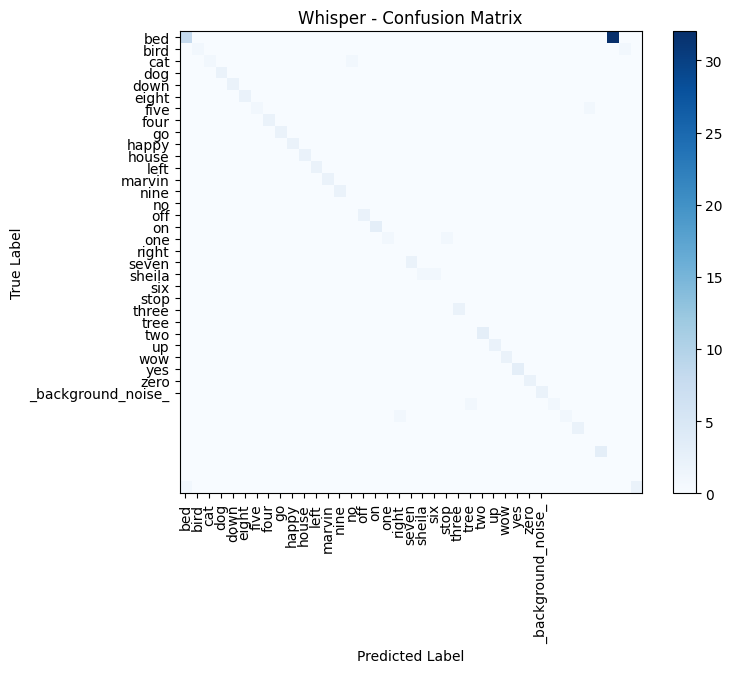

In [15]:
# Plot confusion matrix
conf_mat = confusion_matrix(original_labels, predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
title = 'Whisper'+' - Confusion Matrix'

plt.title(title)
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set tick labels
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.savefig(title+".png", format="png", bbox_inches="tight")

In [21]:
# pd = preprocess_data(test_df.iloc[2])
# print(pd[0])

[-3.0517578e-05  1.2207031e-04  2.1362305e-04 ...  1.8310547e-04
  1.2207031e-04  0.0000000e+00]


In [22]:
# model = WhisperModel('base.en', device='cpu', compute_type='float32')
# segments, _ = model.transcribe(pd[0])
# segments = list(segments)
# predicted_label = segments[0].text.strip().lower()
# original_label = pd[1].strip().lower()